Vamos a lanzar el **Titanic-train.csv** - desde el sitio web de kaggle.  Imprima las primeras 20 filas y analice los datos: qué columnas están presentes, cómo se designan los datos en ellas y qué tipos de datos se utilizan.

In [46]:
import numpy as np
import pandas as pd
import matplotlib
import matplotlib.pyplot as plt
from sklearn.linear_model import LinearRegression

titanic_df = pd.read_csv(r"C:\Users\Ульяна\Desktop\jupiter\datasets\train_titanic .csv")

In [47]:
titanic_df.head(20)
# Pclass - Ticket class
# SibSp - de hermanos/esposos a bordo del Titanic
# Parch - de padres/hijos a bordo del Titanic
# Fare - Tarifa de pasajero
# embarked - Puerto de embarque (C = Cherburgo, Q = Queenstown, S = Southampton)

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S
5,6,0,3,"Moran, Mr. James",male,NaN,0,0,330877,8.4583,NaN,Q
6,7,0,1,"McCarthy, Mr. Timothy J",male,54.0,0,0,17463,51.8625,E46,S
7,8,0,3,"Palsson, Master. Gosta Leonard",male,2.0,3,1,349909,21.0750,NaN,S
8,9,1,3,"Johnson, Mrs. Oscar W (Elisabeth Vilhelmina Berg)",female,27.0,0,2,347742,11.1333,NaN,S
9,10,1,2,"Nasser, Mrs. Nicholas (Adele Achem)",female,14.0,1,0,237736,30.0708,NaN,C


In [48]:
print(titanic_df.dtypes)

PassengerId      int64
Survived         int64
Pclass           int64
Name            object
Sex             object
Age            float64
SibSp            int64
Parch            int64
Ticket          object
Fare           float64
Cabin           object
Embarked        object
dtype: object


In [49]:
titanic_df.columns

Index(['PassengerId', 'Survived', 'Pclass', 'Name', 'Sex', 'Age', 'SibSp',
       'Parch', 'Ticket', 'Fare', 'Cabin', 'Embarked'],
      dtype='object')

Compruebe si hay valores faltantes en las columnas y muestre la suma de todos los valores faltantes en cada una de las columnas.

In [50]:
missing_values = titanic_df.isnull()
missing_values_sum = missing_values.sum()

# Muestra la suma de los valores perdidos
print("Suma de los valores perdidos en cada columna:")
print(missing_values_sum)

Suma de los valores perdidos en cada columna:
PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age            177
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         2
dtype: int64


Reemplace todos los valores perdidos en la columna Edad por medianas en función del sexo de la persona. Obtenga las medianas de edad por sexo. Sustituya los valores que faltan en las columnas Cabina y Embarcado por U (Desconocido).

In [51]:
# Sustitución de los valores de edad que faltan por la mediana en función del sexo
titanic_df['Age'] = titanic_df['Age'].fillna(titanic_df.groupby('Sex')['Age'].transform('median')) # utilice fillna() para reemplazar los valores que faltan en la columna edad

# Sustitución de los valores "Cabina" y "Embarcado" que faltan por "U
titanic_df['Cabin'] = titanic_df['Cabin'].fillna('U')
titanic_df['Embarked'] = titanic_df['Embarked'].fillna('U')

median_age_by_sex = titanic_df.groupby('Sex')['Age'].median()
print("Edad media por sexo:")
print(median_age_by_sex)

Edad media por sexo:
Sex
female    27.0
male      29.0
Name: Age, dtype: float64


In [52]:
titanic_df.isnull().sum()

PassengerId    0
Survived       0
Pclass         0
Name           0
Sex            0
Age            0
SibSp          0
Parch          0
Ticket         0
Fare           0
Cabin          0
Embarked       0
dtype: int64

In [53]:
selected_passenger_ids = [6, 20]
selected_passenger_age = titanic_df.loc[titanic_df['PassengerId'].isin(selected_passenger_ids), ['PassengerId', 'Age']]
print(selected_passenger_age)

    PassengerId   Age
5             6  29.0
19           20  27.0


Sustituir los atributos categóricos 'Sexo' y 'Embarcado' por numéricos< también añadir una nueva columna para definir atributos avanzados como el estatus del pasajero (Mr., Mrs., Miss., Dr., Master, etc.).

In [54]:
# Sustitución de los atributos categóricos "Sexo" y "Embarcado" por atributos numéricos
titanic_df['Sex'] = titanic_df['Sex'].map({'female': 0, 'male': 1}) 
titanic_df['Embarked'] = titanic_df['Embarked'].map({'C': 0, 'Q': 1, 'S': 2})

In [55]:
titanic_df

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",1,22.0,1,0,A/5 21171,7.2500,U,2.0
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",0,38.0,1,0,PC 17599,71.2833,C85,0.0
2,3,1,3,"Heikkinen, Miss. Laina",0,26.0,0,0,STON/O2. 3101282,7.9250,U,2.0
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",0,35.0,1,0,113803,53.1000,C123,2.0
4,5,0,3,"Allen, Mr. William Henry",1,35.0,0,0,373450,8.0500,U,2.0
...,...,...,...,...,...,...,...,...,...,...,...,...
886,887,0,2,"Montvila, Rev. Juozas",1,27.0,0,0,211536,13.0000,U,2.0
887,888,1,1,"Graham, Miss. Margaret Edith",0,19.0,0,0,112053,30.0000,B42,2.0
888,889,0,3,"Johnston, Miss. Catherine Helen ""Carrie""",0,27.0,1,2,W./C. 6607,23.4500,U,2.0
889,890,1,1,"Behr, Mr. Karl Howell",1,26.0,0,0,111369,30.0000,C148,0.0


In [56]:
titanic_df['Title'] = titanic_df['Name'].str.extract(' ([A-Za-z]+)\.', expand=False) 
# str.extract() en la biblioteca Pandas para extraer el Title del nombre del pasajero en la columna 'Nombre'. La expresión regular ' ([A-Za-z]+)\.' se utiliza para encontrar una subcadena que comienza con un espacio seguido de uno o más caracteres alfabéticos (A-Z o a-z) y termina con un punto.
# Por ejemplo, si un pasajero tiene "Braund, Mr. Owen Harris" en la columna "Nombre", la columna "Title" tendrá el valor "Mr.".

# Sustituir los títulos raros y agruparlos en una categoría "Other".
rare_titles = ['Lady', 'Countess','Capt', 'Col', 'Don', 'Dr', 'Major', 'Rev', 'Sir', 'Jonkheer', 'Dona']
titanic_df['Title'] = titanic_df['Title'].replace(rare_titles, 'Other')

# Sustitución del atributo categórico "Title" por un atributo numérico
title_mapping = {'Mr': 1, 'Miss': 2, 'Mrs': 3, 'Master': 4, 'Other': 5}
titanic_df['Title'] = titanic_df['Title'].map(title_mapping)


titanic_df.head(20)

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,Title
0,1,0,3,"Braund, Mr. Owen Harris",1,22.0,1,0,A/5 21171,7.2500,U,2.0,1.0
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",0,38.0,1,0,PC 17599,71.2833,C85,0.0,3.0
2,3,1,3,"Heikkinen, Miss. Laina",0,26.0,0,0,STON/O2. 3101282,7.9250,U,2.0,2.0
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",0,35.0,1,0,113803,53.1000,C123,2.0,3.0
4,5,0,3,"Allen, Mr. William Henry",1,35.0,0,0,373450,8.0500,U,2.0,1.0
5,6,0,3,"Moran, Mr. James",1,29.0,0,0,330877,8.4583,U,1.0,1.0
6,7,0,1,"McCarthy, Mr. Timothy J",1,54.0,0,0,17463,51.8625,E46,2.0,1.0
7,8,0,3,"Palsson, Master. Gosta Leonard",1,2.0,3,1,349909,21.0750,U,2.0,4.0
8,9,1,3,"Johnson, Mrs. Oscar W (Elisabeth Vilhelmina Berg)",0,27.0,0,2,347742,11.1333,U,2.0,3.0
9,10,1,2,"Nasser, Mrs. Nicholas (Adele Achem)",0,14.0,1,0,237736,30.0708,U,0.0,3.0


In [57]:
titanic_df['Title'].fillna('5', inplace=True)

C:\Users\Ульяна\AppData\Local\Temp\ipykernel_9132\3505463087.py:1: FutureWarning: Setting an item of incompatible dtype is deprecated and will raise in a future error of pandas. Value '5' has dtype incompatible with float64, please explicitly cast to a compatible dtype first.
  titanic_df['Title'].fillna('5', inplace=True)


Descartemos las columnas *PassengerId, Name, Ticket, Cabin.* 

In [58]:
titanic_df = titanic_df.drop(['PassengerId', 'Name', 'Ticket', 'Cabin'], axis=1)

titanic_df

,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked,Title
0,0,3,1,22.0,1,0,7.2500,2.0,1.0
1,1,1,0,38.0,1,0,71.2833,0.0,3.0
2,1,3,0,26.0,0,0,7.9250,2.0,2.0
3,1,1,0,35.0,1,0,53.1000,2.0,3.0
4,0,3,1,35.0,0,0,8.0500,2.0,1.0
...,...,...,...,...,...,...,...,...,...
886,0,2,1,27.0,0,0,13.0000,2.0,5.0
887,1,1,0,19.0,0,0,30.0000,2.0,2.0
888,0,3,0,27.0,1,2,23.4500,2.0,2.0
889,1,1,1,26.0,0,0,30.0000,0.0,1.0


Divida los datos en conjuntos de datos de entrenamiento y de prueba, estableciendo el tamaño del conjunto de datos de prueba en 0,25.

In [59]:
titanic_df = titanic_df.dropna()

from sklearn.model_selection import train_test_split

X = titanic_df.drop('Survived', axis=1)
y = titanic_df['Survived']


X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25, random_state=17)

In [60]:
print(X_train.isnull().any()) # nan control

Pclass      False
Sex         False
Age         False
SibSp       False
Parch       False
Fare        False
Embarked    False
Title       False
dtype: bool


Entrenamos con las muestras obtenidas unos cuantos **clasificadores**, que se importan a continuación:

In [61]:
from sklearn.neighbors import KNeighborsClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.tree import DecisionTreeClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, classification_report

In [62]:
# Inicialización de los clasificadores
knn_classifier = KNeighborsClassifier(n_neighbors=5)
naive_bayes_classifier = GaussianNB()
decision_tree_classifier = DecisionTreeClassifier()
logistic_regression_classifier = LogisticRegression()

In [63]:
# Entrenamiento de clasificadores en el conjunto de datos de entrenamiento
knn_classifier.fit(X_train, y_train)
naive_bayes_classifier.fit(X_train, y_train)
decision_tree_classifier.fit(X_train, y_train)
logistic_regression_classifier.fit(X_train, y_train)

C:\Users\Ульяна\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.11_qbz5n2kfra8p0\LocalCache\local-packages\Python311\site-packages\sklearn\linear_model\_logistic.py:460: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


LogisticRegression()

In [64]:
# Predicciones sobre un conjunto de datos de prueba
knn_predictions = knn_classifier.predict(X_test)
naive_bayes_predictions = naive_bayes_classifier.predict(X_test)
decision_tree_predictions = decision_tree_classifier.predict(X_test)
logistic_regression_predictions = logistic_regression_classifier.predict(X_test)

In [65]:
# Evaluación del rendimiento
print("Accuracy for KNN:", accuracy_score(y_test, knn_predictions))
print("Accuracy for Naive Bayes:", accuracy_score(y_test, naive_bayes_predictions))
print("Accuracy for Decision Tree:", accuracy_score(y_test, decision_tree_predictions))
print("Accuracy for Logistic Regression:", accuracy_score(y_test, logistic_regression_predictions))

Accuracy for KNN: 0.7130044843049327
Accuracy for Naive Bayes: 0.820627802690583
Accuracy for Decision Tree: 0.7668161434977578
Accuracy for Logistic Regression: 0.8161434977578476


In [66]:
# Información adicional sobre el rendimiento
print("\nClassification Report for KNN:\n", classification_report(y_test, knn_predictions))
print("\nClassification Report for Naive Bayes:\n", classification_report(y_test, naive_bayes_predictions))
print("\nClassification Report for Decision Tree:\n", classification_report(y_test, decision_tree_predictions))
print("\nClassification Report for Logistic Regression:\n", classification_report(y_test, logistic_regression_predictions))


Classification Report for KNN:
               precision    recall  f1-score   support

           0       0.70      0.87      0.77       126
           1       0.75      0.52      0.61        97

    accuracy                           0.71       223
   macro avg       0.72      0.69      0.69       223
weighted avg       0.72      0.71      0.70       223


Classification Report for Naive Bayes:
               precision    recall  f1-score   support

           0       0.85      0.83      0.84       126
           1       0.79      0.80      0.80        97

    accuracy                           0.82       223
   macro avg       0.82      0.82      0.82       223
weighted avg       0.82      0.82      0.82       223


Classification Report for Decision Tree:
               precision    recall  f1-score   support

           0       0.79      0.79      0.79       126
           1       0.73      0.73      0.73        97

    accuracy                           0.77       223
   macro av

In [67]:
from sklearn.metrics import precision_score, recall_score, f1_score

# Evaluación del rendimiento mediante medidas de precisión, exhaustividad y F1
def evaluate_performance(y_true, y_pred):
    precision = precision_score(y_true, y_pred)
    recall = recall_score(y_true, y_pred)
    f1 = f1_score(y_true, y_pred)
    return precision, recall, f1

# Evaluación del rendimiento de cada clasificador
knn_precision, knn_recall, knn_f1 = evaluate_performance(y_test, knn_predictions)
naive_bayes_precision, naive_bayes_recall, naive_bayes_f1 = evaluate_performance(y_test, naive_bayes_predictions)
decision_tree_precision, decision_tree_recall, decision_tree_f1 = evaluate_performance(y_test, decision_tree_predictions)
logistic_regression_precision, logistic_regression_recall, logistic_regression_f1 = evaluate_performance(y_test, logistic_regression_predictions)

# Resultados
print("Performance Metrics for KNN:")
print("Precision:", knn_precision)
print("Recall:", knn_recall)
print("F1 Score:", knn_f1)

print("\nPerformance Metrics for Naive Bayes:")
print("Precision:", naive_bayes_precision)
print("Recall:", naive_bayes_recall)
print("F1 Score:", naive_bayes_f1)

print("\nPerformance Metrics for Decision Tree:")
print("Precision:", decision_tree_precision)
print("Recall:", decision_tree_recall)
print("F1 Score:", decision_tree_f1)

print("\nPerformance Metrics for Logistic Regression:")
print("Precision:", logistic_regression_precision)
print("Recall:", logistic_regression_recall)
print("F1 Score:", logistic_regression_f1)


Performance Metrics for KNN:
Precision: 0.746268656716418
Recall: 0.5154639175257731
F1 Score: 0.6097560975609757

Performance Metrics for Naive Bayes:
Precision: 0.7878787878787878
Recall: 0.8041237113402062
F1 Score: 0.7959183673469388

Performance Metrics for Decision Tree:
Precision: 0.7319587628865979
Recall: 0.7319587628865979
F1 Score: 0.7319587628865979

Performance Metrics for Logistic Regression:
Precision: 0.8043478260869565
Recall: 0.7628865979381443
F1 Score: 0.7830687830687831


En el caso del conjunto de datos del Titanic, en lo que respecta a la predicción de la supervivencia de los pasajeros, la métrica más importante es la exhaustividad (recall). La exhaustividad mide la capacidad del modelo para detectar todos los casos positivos, es decir, los supervivientes. En este contexto, el objetivo puede ser minimizar los errores falsos negativos (FN), es decir, reducir el número de casos en los que el modelo predice que un pasajero no sobrevivió cuando en realidad sí lo hizo.


La precisión también es importante, pero en este caso la exhaustividad es más prioritaria, ya que nuestro objetivo es maximizar el número de casos de supervivencia predichos correctamente.

**Para cada clasificador, obtenemos la matriz de error y calculamos la métrica recall de forma independiente**

In [68]:
from sklearn.metrics import confusion_matrix, recall_score, precision_score

In [69]:
# Matriz de errores y recall para KNN
knn_conf_matrix = confusion_matrix(y_test, knn_predictions)
knn_recall = knn_conf_matrix[1, 1] / (knn_conf_matrix[1, 0] + knn_conf_matrix[1, 1])

# Métrica de recall incorporada para KNN
knn_recall_builtin = recall_score(y_test, knn_predictions)

print("Confusion Matrix for KNN:\n", knn_conf_matrix)
print("Recall for KNN (calculated):", knn_recall)
print("Recall for KNN (builtin):", knn_recall_builtin)
print()


Confusion Matrix for KNN:
 [[109  17]
 [ 47  50]]
Recall for KNN (calculated): 0.5154639175257731
Recall for KNN (builtin): 0.5154639175257731



In [70]:
# Matriz de errores y recall para naive Bayes
naive_bayes_conf_matrix = confusion_matrix(y_test, naive_bayes_predictions)
naive_bayes_recall = naive_bayes_conf_matrix[1, 1] / (naive_bayes_conf_matrix[1, 0] + naive_bayes_conf_matrix[1, 1])

# Métrica incorporada de recall para naive Bayes
naive_bayes_recall_builtin = recall_score(y_test, naive_bayes_predictions)

print("Confusion Matrix for Naive Bayes:\n", naive_bayes_conf_matrix)
print("Recall for Naive Bayes (calculated):", naive_bayes_recall)
print("Recall for Naive Bayes (builtin):", naive_bayes_recall_builtin)
print()

Confusion Matrix for Naive Bayes:
 [[105  21]
 [ 19  78]]
Recall for Naive Bayes (calculated): 0.8041237113402062
Recall for Naive Bayes (builtin): 0.8041237113402062



In [71]:
# Matriz de errores y recall para Decision Tree
decision_tree_conf_matrix = confusion_matrix(y_test, decision_tree_predictions)
decision_tree_recall = decision_tree_conf_matrix[1, 1] / (decision_tree_conf_matrix[1, 0] + decision_tree_conf_matrix[1, 1])

# Métrica de recall incorporada para Decision Tree
decision_tree_recall_builtin = recall_score(y_test, decision_tree_predictions)

print("Confusion Matrix for Decision Tree:\n", decision_tree_conf_matrix)
print("Recall for Decision Tree (calculated):", decision_tree_recall)
print("Recall for Decision Tree (builtin):", decision_tree_recall_builtin)
print()

Confusion Matrix for Decision Tree:
 [[100  26]
 [ 26  71]]
Recall for Decision Tree (calculated): 0.7319587628865979
Recall for Decision Tree (builtin): 0.7319587628865979



In [72]:
# Matriz de errores y recall para Logistic Regression
logistic_regression_conf_matrix = confusion_matrix(y_test, logistic_regression_predictions)
logistic_regression_recall = logistic_regression_conf_matrix[1, 1] / (logistic_regression_conf_matrix[1, 0] + logistic_regression_conf_matrix[1, 1])

# Métrica de recall incorporada para Logistic Regression
logistic_regression_recall_builtin = recall_score(y_test, logistic_regression_predictions)

print("Confusion Matrix for Logistic Regression:\n", logistic_regression_conf_matrix)
print("Recall for Logistic Regression (calculated):", logistic_regression_recall)
print("Recall for Logistic Regression (builtin):", logistic_regression_recall_builtin)
print()

Confusion Matrix for Logistic Regression:
 [[108  18]
 [ 23  74]]
Recall for Logistic Regression (calculated): 0.7628865979381443
Recall for Logistic Regression (builtin): 0.7628865979381443



Modelo con el Mejor **recall**

In [73]:
best_model = "KNN" if knn_recall > naive_bayes_recall and knn_recall > decision_tree_recall and knn_recall > logistic_regression_recall else \
             "Naive Bayes" if naive_bayes_recall > decision_tree_recall and naive_bayes_recall > logistic_regression_recall else \
             "Decision Tree" if decision_tree_recall > logistic_regression_recall else "Logistic Regression"

print("Modelo con el Mejor Recall:", best_model)

Modelo con el Mejor Recall: Naive Bayes


Ahora considere **la medida-F** , la métrica agregada de precision y recall, y el **AUC-ROC** más complejo.

Seleccionamos el clasificador que dio el valor más bajo de recall **(kNN)**, calculamos para él precision, aplicando precision_score, y calculamos independientemente la medida F1 

In [74]:
from sklearn.metrics import precision_score, recall_score, f1_score

In [75]:
knn_precision = precision_score(y_test, knn_predictions)
knn_recall = recall_score(y_test, knn_predictions)
knn_f1_score = f1_score(y_test, knn_predictions)

In [76]:
# Ahora se puede comparar la medida F1 con la media aritmética de integridad y precisión
average_precision_recall = (knn_precision + knn_recall) / 2

In [77]:
print("Precision for KNN:", knn_precision)
print("Recall for KNN:", knn_recall)
print("F1 Score for KNN (manual calculation):", knn_f1_score)
print("Average of Precision and Recall:", average_precision_recall)

Precision for KNN: 0.746268656716418
Recall for KNN: 0.5154639175257731
F1 Score for KNN (manual calculation): 0.6097560975609757
Average of Precision and Recall: 0.6308662871210955


In [78]:
from sklearn.metrics import precision_recall_fscore_support

# Например, если ваш наименьший recall был у KNN
precision, recall, f1_score, support = precision_recall_fscore_support(y_test, knn_predictions)

# Выводим массив значений 
print("Precision:", precision)
print("Recall:", recall)
print("F1 Score:", f1_score)
print("Support:", support)


Precision: [0.69871795 0.74626866]
Recall: [0.86507937 0.51546392]
F1 Score: [0.77304965 0.6097561 ]
Support: [126  97]


**Breve explicación de los resultados:**

Precisión (Precision):

1) Clase 0( no sobrevivió): 69.87%
2) Clase 1 (sobreviviente): 74.63%
La precisión evalúa cuánto clasifica correctamente el modelo los casos positivos.

Integridad (Recall):

1) Clase 0( no sobrevivió): 86.51%
2) Clase 1 (sobreviviente): 51.55%
La integridad mide la cantidad de casos positivos reales que un modelo logra detectar.

F1-medida (F1 Score):

1) Clase 0( no sobrevivió): 77.30%
2) Clase 1 (sobreviviente): 60.98%
La medida F1 combina precisión e integridad en una sola métrica, dadas ambas características.

Support:

1) Clase 0 (no sobrevivió): 126 copias
2) Clase 1 (sobreviviente): 97 ejemplares
Support proporciona información sobre el número de instancias en cada clase en el conjunto de pruebas.

In [79]:
from sklearn.model_selection import StratifiedKFold # Esta es una validación cruzada de bloque K estratificada. La estratificación garantiza que cada bloque tenga el mismo porcentaje de ejemplos positivos y negativos que en el conjunto de datos original.
from sklearn.linear_model import LogisticRegressionCV
import numpy as np

In [80]:
# Dividimos los datos para la validación cruzada
stratified_kfold = StratifiedKFold(n_splits=5, shuffle=True, random_state=17)

In [81]:
# Establezca el intervalo para el parámetro C usando numpy.logspace
param_values = np.logspace(-1, 2, 500)

# Esto crea 500 valores entre 10^(-1) y 10^2. Estos valores se usarán como posibles valores del parámetro C para la regresión logística.

In [82]:
# Utilizamos LogisticRegressionCV para seleccionar el parámetro óptimo C
logreg_cv = LogisticRegressionCV(Cs=param_values, cv=stratified_kfold, scoring='roc_auc', random_state=17) # queremos optimizar

logreg_cv.fit(X_train, y_train)

C:\Users\Ульяна\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.11_qbz5n2kfra8p0\LocalCache\local-packages\Python311\site-packages\sklearn\linear_model\_logistic.py:460: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


C:\Users\Ульяна\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.11_qbz5n2kfra8p0\LocalCache\local-packages\Python311\site-packages\sklearn\linear_model\_logistic.py:460: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(
C:\Users\Ульяна\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.11_qbz5n2kfra8p0\LocalCache\local-packages\Python311\site-packages\sklearn\linear_model\_logistic.py:460: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/st

LogisticRegressionCV(Cs=array([  0.1       ,   0.10139395,   0.10280732,   0.1042404 ,
         0.10569346,   0.10716676,   0.10866061,   0.11017528,
         0.11171107,   0.11326826,   0.11484715,   0.11644806,
         0.11807128,   0.11971713,   0.12138593,   0.12307798,
         0.12479362,   0.12653318,   0.12829698,   0.13008537,
         0.13189869,   0.13373729,   0.13560151,   0.13749172,
         0.13940828,   0.14135156,   0.14332192,   0.14531975,
         0.14734543,   0.149399...
        72.73165113,  73.7454909 ,  74.77346305,  75.81576458,
        76.87259522,  77.9441575 ,  79.03065679,  80.13230128,
        81.24930211,  82.38187331,  83.53023195,  84.69459808,
        85.87519485,  87.07224849,  88.28598841,  89.51664721,
        90.76446073,  92.02966809,  93.31251175,  94.61323756,
        95.93209478,  97.26933615,  98.62521795, 100.        ]),
                     cv=StratifiedKFold(n_splits=5, random_state=17, shuffle=True),
                     random_state=17, scoring='roc_auc')

Mostraremos un gráfico de la dependencia de auc_roc del valor de C.

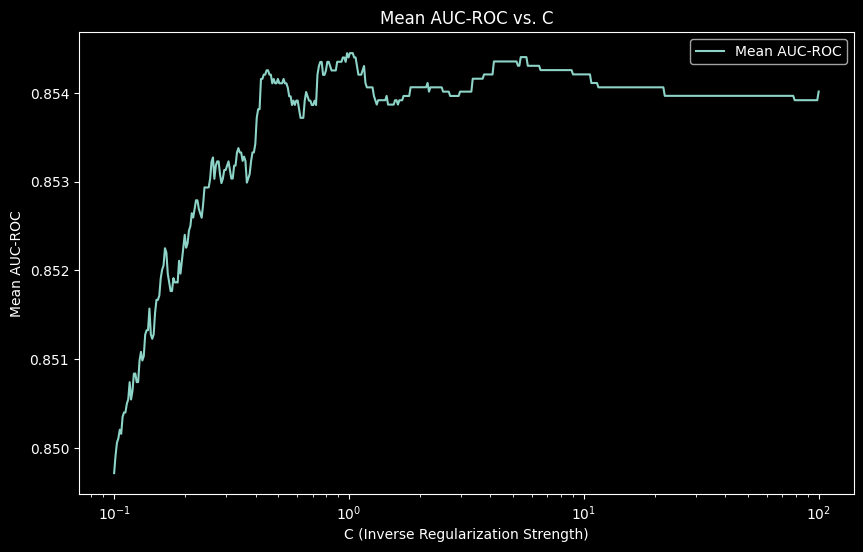

In [85]:
import matplotlib.pyplot as plt
import numpy as np

C_values = np.logspace(-1, 2, 500)
mean_auc_roc_values = logreg_cv.scores_[1].mean(axis=0)

plt.figure(figsize=(10, 6))
plt.plot(C_values, mean_auc_roc_values, label='Mean AUC-ROC')
plt.xscale('log')
plt.title('Mean AUC-ROC vs. C')
plt.xlabel('C (Inverse Regularization Strength)')
plt.ylabel('Mean AUC-ROC')
plt.legend()
plt.show()

Best C: 1.0092715146305713


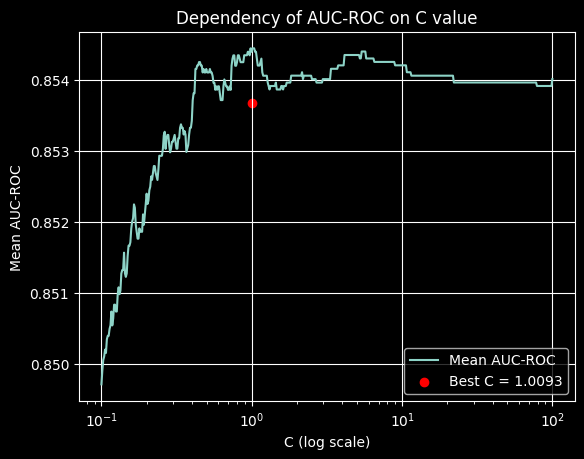

In [86]:
best_C = logreg_cv.C_[0]
print("Best C:", best_C)

# Gráfico de la dependencia de auc_roc del valor de C
plt.plot(C_values, mean_auc_roc_values, label='Mean AUC-ROC')
plt.scatter(best_C, logreg_cv.scores_[1].mean(), color='red', label=f'Best C = {best_C:.4f}')
plt.xscale('log')
plt.xlabel('C (log scale)')
plt.ylabel('Mean AUC-ROC')
plt.title('Dependency of AUC-ROC on C value')
plt.legend()
plt.grid(True)
plt.show()

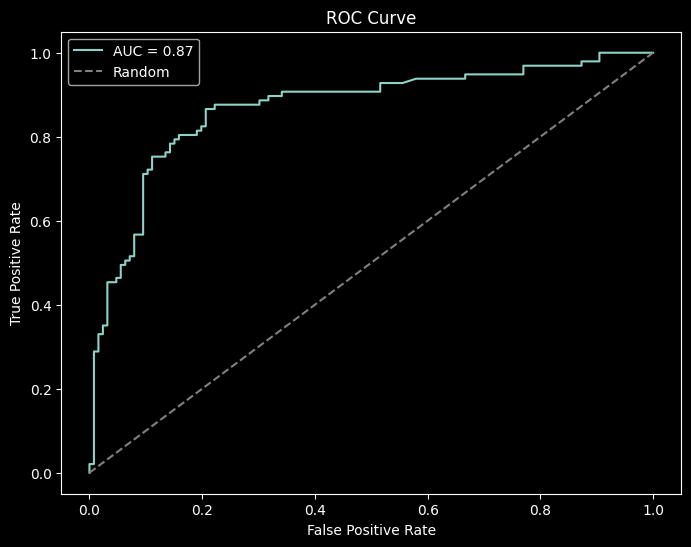

AUC: 0.8684


In [87]:
from sklearn.metrics import roc_curve, roc_auc_score

# Obtención de probabilidades de pertenencia a clases
y_proba = logreg_cv.predict_proba(X_test)[:, 1]

# Cálculo de la curva ROC y el AUC
fpr, tpr, thresholds = roc_curve(y_test, y_proba)
roc_auc = roc_auc_score(y_test, y_proba)

# Cálculo de la curva ROC y el AUC
plt.figure(figsize=(8, 6))
plt.plot(fpr, tpr, label=f'AUC = {roc_auc:.2f}')
plt.plot([0, 1], [0, 1], linestyle='--', color='gray', label='Random')
plt.title('ROC Curve')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.legend()
plt.show()

print(f'AUC: {roc_auc:.4f}')
